<a href="https://colab.research.google.com/github/PKalyani1994/Regression_Project/blob/Colab/KALYANI_ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Padala Kalyani

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/PKalyani1994/Regression_Project

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [53]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

from scipy.stats import ttest_rel

from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### Dataset Loading

In [32]:
# Load Dataset
df = pd.read_csv('/content/data_YesBank_StockPrices.csv')

### Dataset First View

In [33]:
# Dataset First Look
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [34]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [35]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [36]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [37]:
# Missing Values/Null Values Count
df.isnull().sum().sum()

np.int64(0)

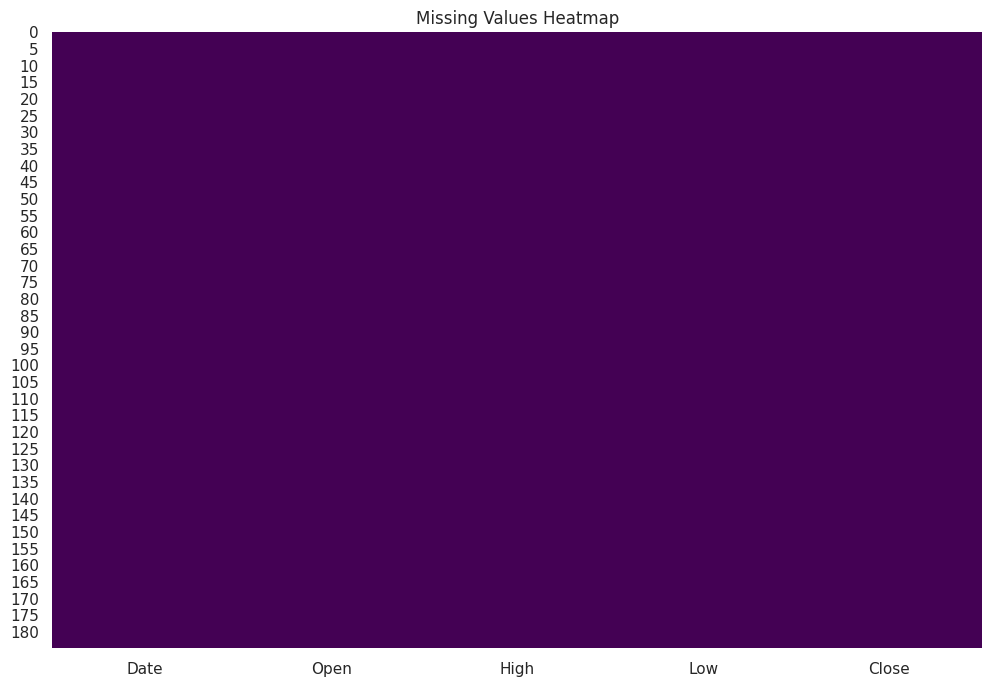

In [38]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [39]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [40]:
# Dataset Describe
round(df.describe(),2)

,Open,High,Low,Close
count,185.00,185.00,185.00,185.00
mean,105.54,116.10,94.95,105.20
std,98.88,106.33,91.22,98.58
min,10.00,11.24,5.55,9.98
25%,33.80,36.14,28.51,33.45
50%,62.98,72.55,58.00,62.54
75%,153.00,169.19,138.35,153.30
max,369.95,404.00,345.50,367.90


### Check Unique Values for each variable.

In [41]:
# Check Unique Values for each variable.
df['Date'].unique()

array(['Jul-05', 'Aug-05', 'Sep-05', 'Oct-05', 'Nov-05', 'Dec-05',
       'Jan-06', 'Feb-06', 'Mar-06', 'Apr-06', 'May-06', 'Jun-06',
       'Jul-06', 'Aug-06', 'Sep-06', 'Oct-06', 'Nov-06', 'Dec-06',
       'Jan-07', 'Feb-07', 'Mar-07', 'Apr-07', 'May-07', 'Jun-07',
       'Jul-07', 'Aug-07', 'Sep-07', 'Oct-07', 'Nov-07', 'Dec-07',
       'Jan-08', 'Feb-08', 'Mar-08', 'Apr-08', 'May-08', 'Jun-08',
       'Jul-08', 'Aug-08', 'Sep-08', 'Oct-08', 'Nov-08', 'Dec-08',
       'Jan-09', 'Feb-09', 'Mar-09', 'Apr-09', 'May-09', 'Jun-09',
       'Jul-09', 'Aug-09', 'Sep-09', 'Oct-09', 'Nov-09', 'Dec-09',
       'Jan-10', 'Feb-10', 'Mar-10', 'Apr-10', 'May-10', 'Jun-10',
       'Jul-10', 'Aug-10', 'Sep-10', 'Oct-10', 'Nov-10', 'Dec-10',
       'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11',
       'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11',
       'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12',
       'Jul-12', 'Aug-12', 'Sep-12', 'Oct-12', 'Nov-12', 'Dec-

### Variables Description

###**1. Date**

**Type**: Time (monthly)

**Description**: Represents the month and year of the stock data. Example: "Jul-05" means July 2005.

**Usage**: This will be converted into a proper datetime format for analysis and time-series modeling.

###**2. Open**

**Type**: Numeric (float)

**Description**: The stock’s opening price at the beginning of the month (first trading day).

**Example**: 62.98 means the stock opened at ₹62.98.

###**3. High**

**Type**: Numeric (float)

**Description**: The highest trading price of the stock during that month.

**Example**: 404.00 means the stock touched a maximum of ₹404.00 that month.

###**4. Low**

**Type**: Numeric (float)

**Description**: The lowest trading price of the stock during that month.

**Example**: 5.55 means the stock dropped to as low as ₹5.55 in that month.

###**5. Close**

**Type***: Numeric (float)

**Description**: The closing price of the stock at the end of the month (last trading day).

**Example**: 105.20 means the stock closed at ₹105.20.

###**Summary**:

Data covers 185 months (Jul-2005 to Nov-2020).

Stock prices range widely (Low = 5.55, High = 404.00), showing high volatility.

Mean prices are around ₹100 (e.g., Close ≈ ₹105).

## 3. ***Data Wrangling***

### Data Wrangling Code

In [42]:
# Write your code to make your dataset analysis ready.
bank_dataset = df.copy()

# Typecasting the date column to datetime datatype as it is in object datatype
bank_dataset['Date'] = pd.to_datetime(bank_dataset['Date'], format='%b-%y')

# Shift to month end as by default, pandas assigns the first day of the month (01) since input doesn’t specify the day.
bank_dataset['Date'] = bank_dataset['Date'] + pd.offsets.MonthEnd(0)

bank_dataset.head()

,Date,Open,High,Low,Close
0,2005-07-31,13.00,14.00,11.25,12.46
1,2005-08-31,12.58,14.88,12.55,13.42
2,2005-09-30,13.48,14.87,12.27,13.30
3,2005-10-31,13.20,14.47,12.40,12.99
4,2005-11-30,13.35,13.88,12.88,13.41


### What all manipulations have you done and insights you found?

1. There are no missing values, no imputations required.
2. Date column is converted to Datetime format for data type consistency.
3. Dataset is ready for analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Univariate Analysis (Raw Data)**

#### Chart - 1

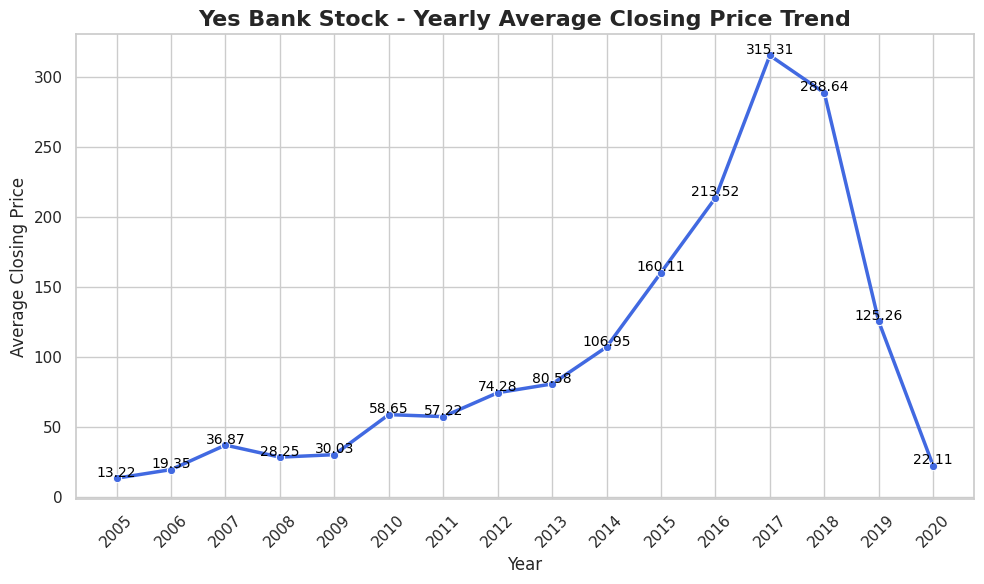

In [43]:
# Chart - 1 visualization code

# Extract month and year into new columns
bank_dataset['Year'] = bank_dataset['Date'].dt.year
bank_dataset['Month_Name'] = bank_dataset['Date'].dt.strftime('%b')

# Group data by Year and calculate average Close price
yearly_trend = bank_dataset.groupby('Year')['Close'].mean().reset_index()

# Set the style
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")

# Plot line with markers
sns.lineplot(data=yearly_trend, x='Year', y='Close', marker='o', linewidth=2.5, color='royalblue')

# Titles and labels
plt.title("Yes Bank Stock - Yearly Average Closing Price Trend", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Closing Price", fontsize=12)

# Show values on points
for x, y in zip(yearly_trend['Year'], yearly_trend['Close']):
    plt.text(x, y+1, f"{y:.2f}", ha='center', fontsize=10, color='black')

# Beautify x-axis
plt.xticks(yearly_trend['Year'], rotation=45)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

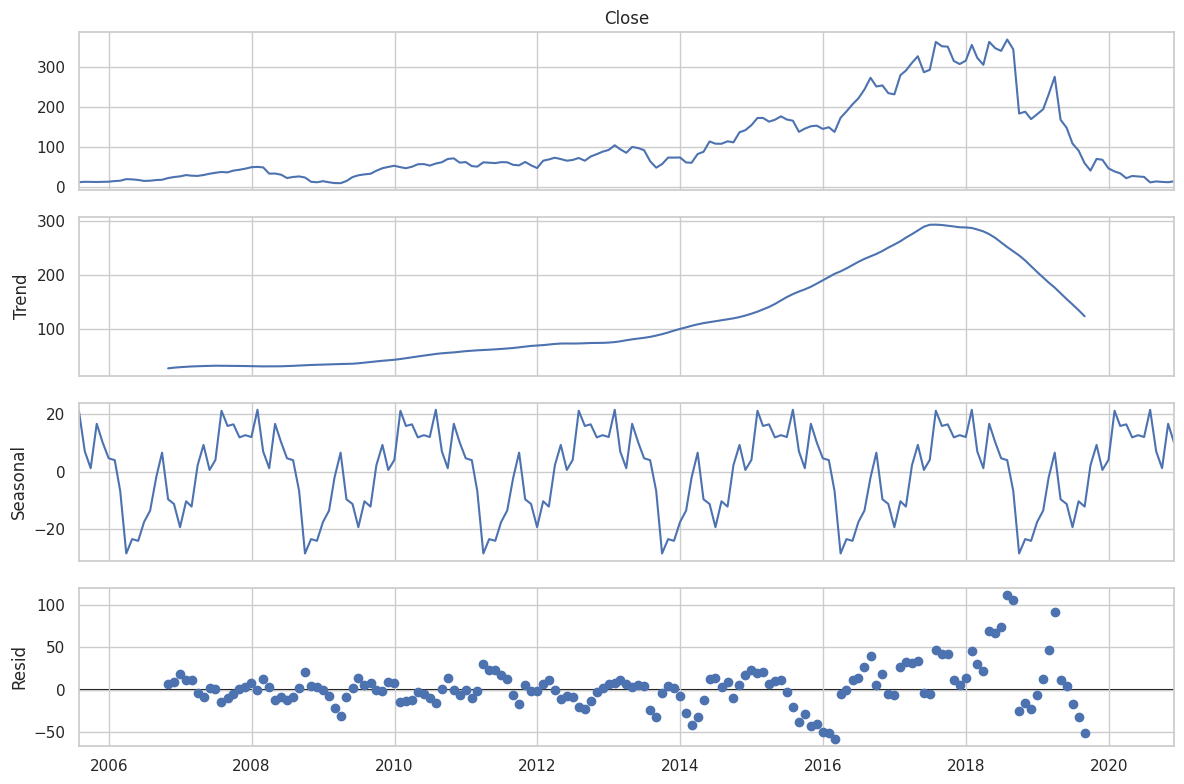

In [44]:
# Chart - 2 visualization code
# Time Series Decomposition

# Make sure Date is index
bank_dataset = bank_dataset.set_index('Date')

# Decompose (using Close price as an example)
decomp = seasonal_decompose(bank_dataset['Close'], model='additive', period=30)  # 30 ≈ monthly pattern for daily data

# Plot
plt.rcParams.update({'figure.figsize': (12,8)})
decomp.plot()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

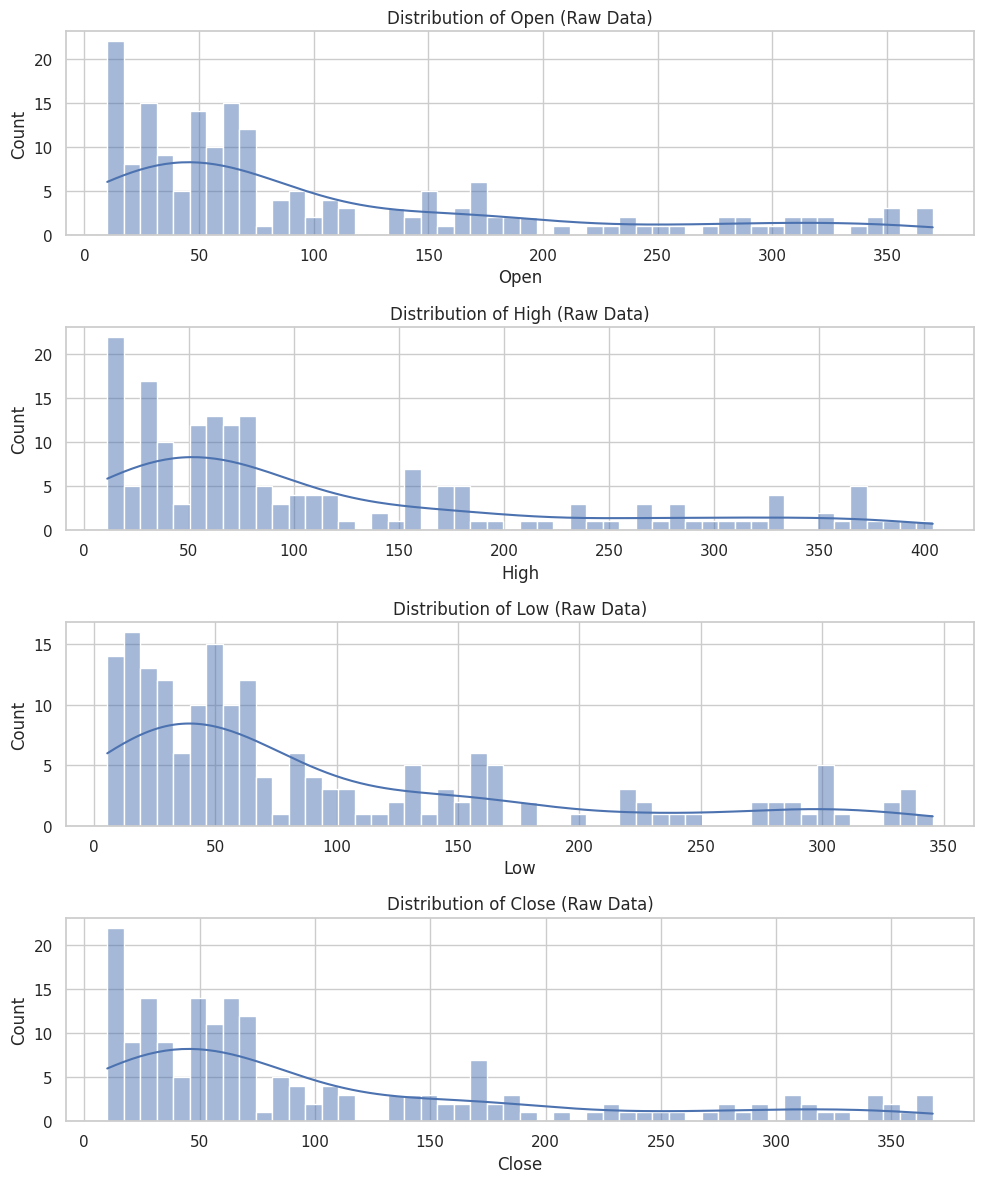

In [45]:
# Chart - 3 visualization code
# Histograms of raw data

price_cols = ['Open', 'High', 'Low', 'Close']
fig, axes = plt.subplots(len(price_cols), 1, figsize=(10, 12))

for i, col in enumerate(price_cols):
    sns.histplot(bank_dataset[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} (Raw Data)")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

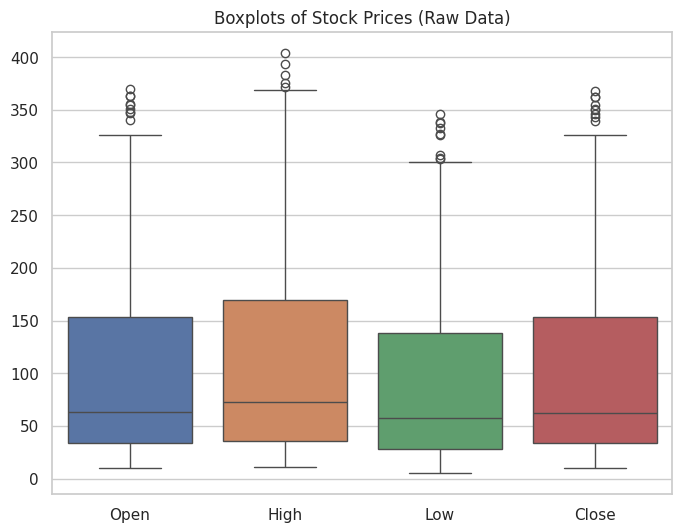

In [46]:
# Chart - 4 visualization code
# Boxplots (to show outliers)

price_cols = ['Open', 'High', 'Low', 'Close']

plt.figure(figsize=(8,6))
sns.boxplot(data=bank_dataset[price_cols])
plt.title("Boxplots of Stock Prices (Raw Data)")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

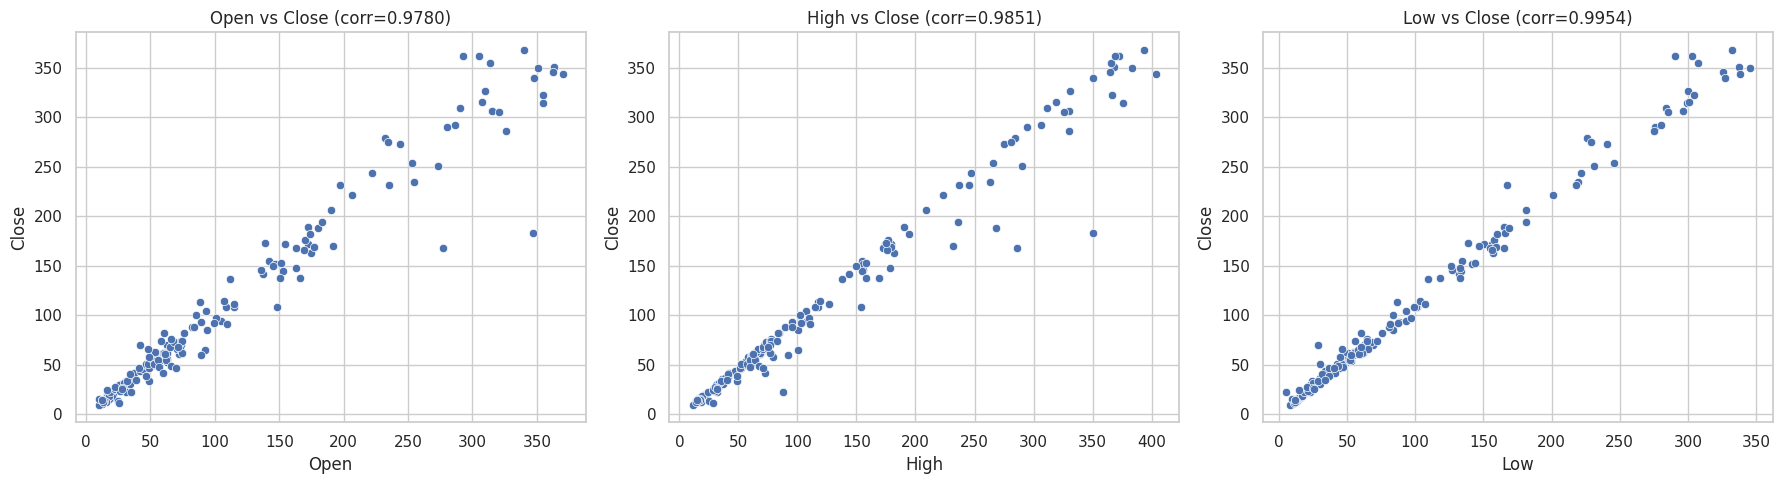

In [47]:
# Chart - 5 visualization code
# Scatter plots with correlation values

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(['Open','High','Low']):
    sns.scatterplot(x=bank_dataset[col], y=bank_dataset['Close'], ax=axes[i])
    corr = bank_dataset[col].corr(bank_dataset['Close'])
    axes[i].set_title(f"{col} vs Close (corr={corr:.4f})")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

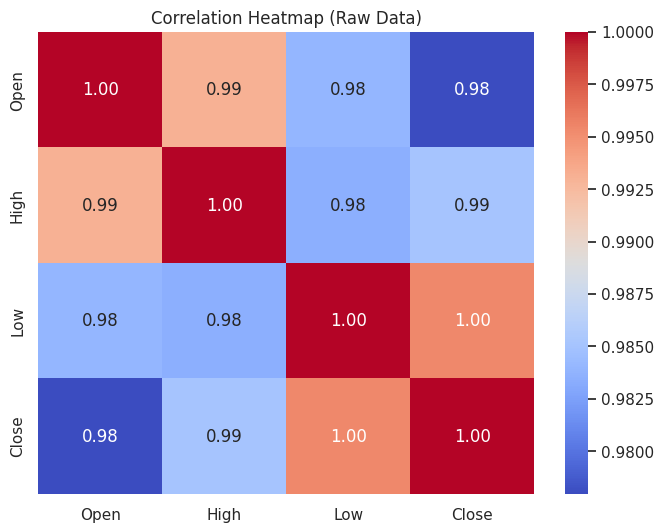

In [48]:
# Chart - 6 visualization code
# Correlation Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(bank_dataset[price_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Raw Data)")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

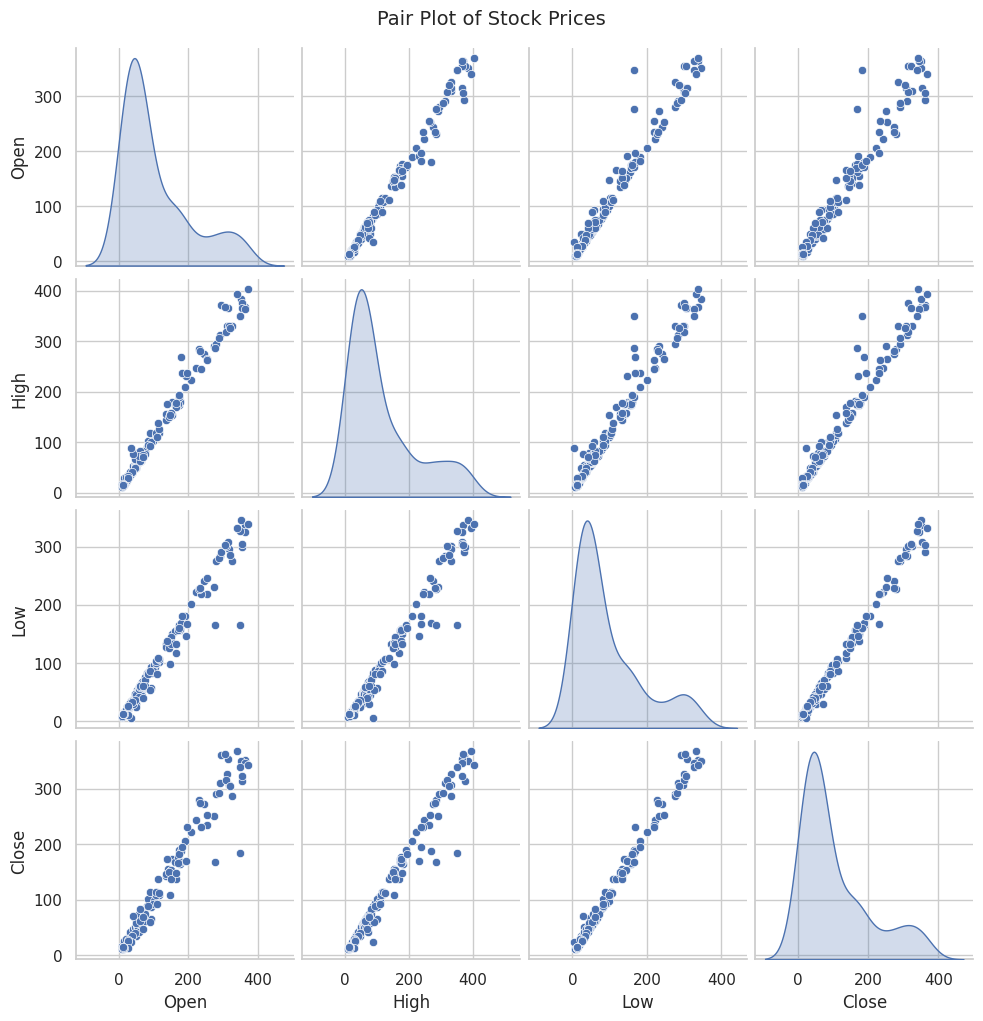

In [50]:
# Chart - 7 visualization code
# Pair plot

sns.pairplot(bank_dataset[price_cols], diag_kind="kde")

plt.suptitle("Pair Plot of Stock Prices", y=1.02, fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

### **Hypothesis 1** : Is the average Closing price significantly different from the average Opening price?

**H₀**: Mean Close = Mean Open

**H₁**: Mean Close ≠ Mean Open

#### 2. Perform an appropriate statistical test.

Hypothesis 1: Open vs Close Means
T-statistic: 0.2210, P-value: 0.8254
Fail to Reject H₀ → No significant difference between Open and Close prices.


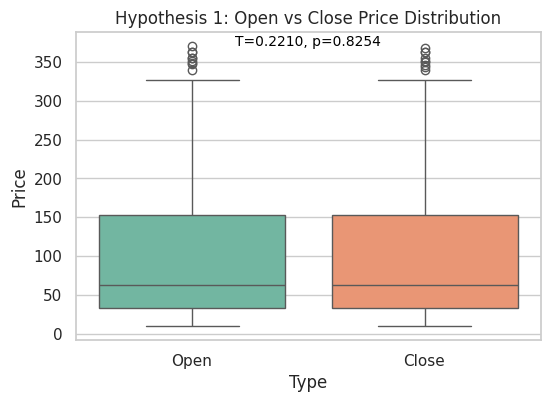

In [51]:
# Perform Statistical Test to obtain P-Value
# Hypothesis Test Paired t-test: Open vs Close
t_stat1, p_value1 = ttest_rel(bank_dataset['Open'], bank_dataset['Close'])

print("Hypothesis 1: Open vs Close Means")
print(f"T-statistic: {t_stat1:.4f}, P-value: {p_value1:.4f}")

if p_value1 < 0.05:
    print("Reject H₀ → Significant difference between Open and Close prices.")
else:
    print("Fail to Reject H₀ → No significant difference between Open and Close prices.")

# Prepare data for plot
price_comp = bank_dataset[['Open', 'Close']].melt(var_name='Type', value_name='Price')

plt.figure(figsize=(6,4))
sns.boxplot(x='Type', y='Price', data=price_comp, palette='Set2', legend=False,hue='Type')
plt.title("Hypothesis 1: Open vs Close Price Distribution")
plt.ylabel("Price")

# Add annotation
plt.text(0.5, max(price_comp['Price']),
         f"T={t_stat1:.4f}, p={p_value1:.4f}",
         ha='center', fontsize=10, color='black')

plt.show()

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

### **Hypothesis 2**: Are daily High prices on average significantly higher than Low prices?

**H₀**: Mean High = Mean Low

**H₁**: Mean High > Mean Low

#### 2. Perform an appropriate statistical test.


Hypothesis 2: High vs Low Means
T-statistic: 12.2697, P-value: 0.0000
Reject H₀ → High prices are significantly greater than Low prices.


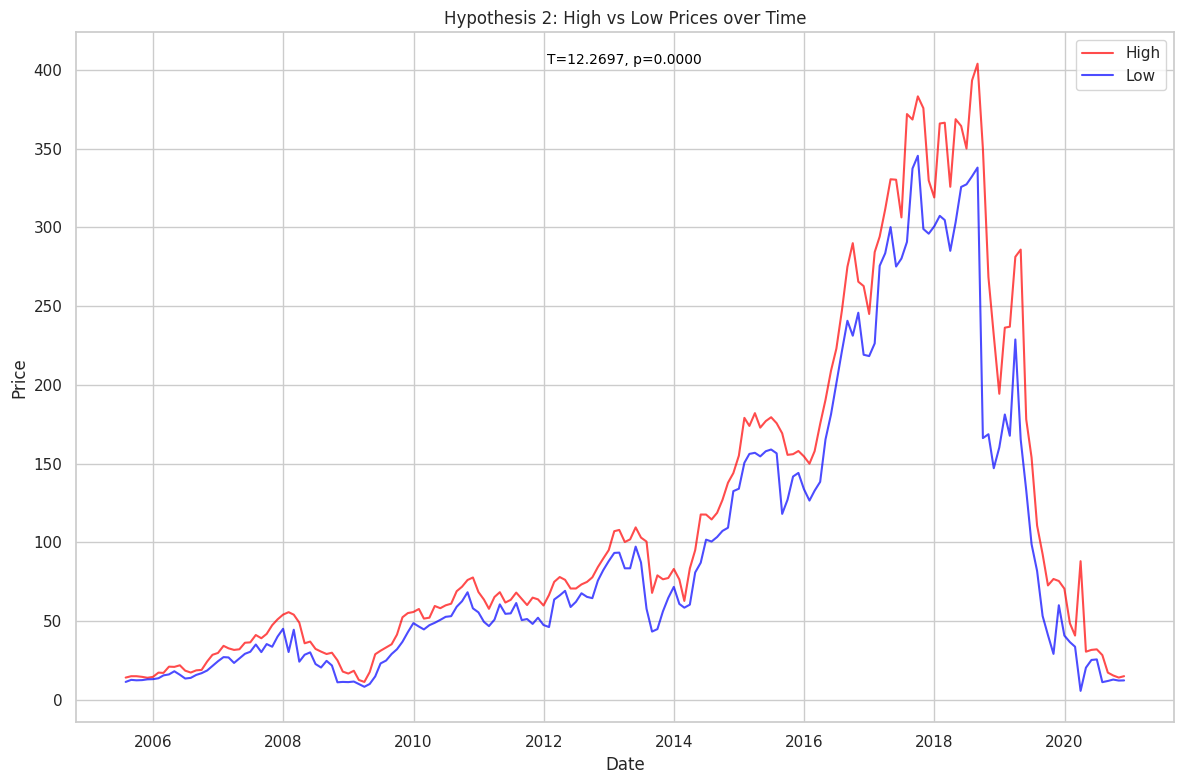

In [52]:
# Perform Statistical Test to obtain P-Value
# One-tailed paired t-test: High vs Low
t_stat2, p_value2 = ttest_rel(bank_dataset['High'], bank_dataset['Low'])

print("\nHypothesis 2: High vs Low Means")
print(f"T-statistic: {t_stat2:.4f}, P-value: {p_value2/2:.4f}")  # one-tailed

if (p_value2/2 < 0.05) and (t_stat2 > 0):
    print("Reject H₀ → High prices are significantly greater than Low prices.")
else:
    print("Fail to Reject H₀ → No significant difference found.")

plt.plot(bank_dataset.index, bank_dataset['High'], label='High', color='red', alpha=0.7)
plt.plot(bank_dataset.index, bank_dataset['Low'], label='Low', color='blue', alpha=0.7)

plt.title("Hypothesis 2: High vs Low Prices over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Annotation at middle date
plt.text(bank_dataset.index[len(bank_dataset)//2],
         max(bank_dataset['High']),
         f"T={t_stat2:.4f}, p={p_value2/2:.4f}",
         ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

### **Hypothesis 3**: Do average Closing prices differ between the first half and the second half of the time period?

**H₀**: Mean Close (first half) = Mean Close (second half)

**H₁**: Mean Close (first half) ≠ Mean Close (second half)

#### 2. Perform an appropriate statistical test.


Hypothesis 3: Close Price First Half vs Second Half
T-statistic: -11.0779, P-value: 0.0000
Reject H₀ → Closing prices differ significantly between the two halves.


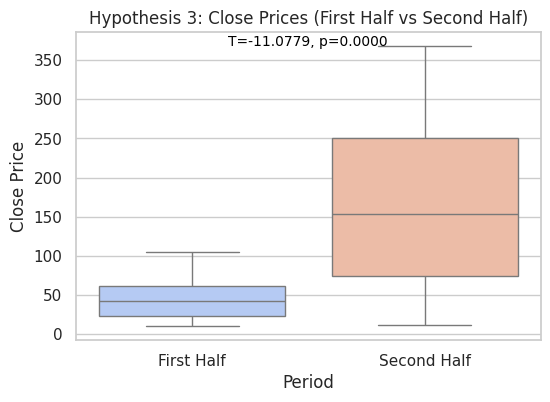

In [54]:
# Perform Statistical Test to obtain P-Value
# Split dataset into two halves

mid = len(bank_dataset) // 2
close_first_half = bank_dataset['Close'].iloc[:mid]
close_second_half = bank_dataset['Close'].iloc[mid:]

# Independent samples t-test
t_stat3, p_value3 = ttest_ind(close_first_half, close_second_half, equal_var=False)

print("\nHypothesis 3: Close Price First Half vs Second Half")
print(f"T-statistic: {t_stat3:.4f}, P-value: {p_value3:.4f}")

if p_value3 < 0.05:
    print("Reject H₀ → Closing prices differ significantly between the two halves.")
else:
    print("Fail to Reject H₀ → No significant difference in Closing prices.")

# Label periods
bank_dataset['Period'] = ['First Half' if i < mid else 'Second Half' for i in range(len(bank_dataset))]

plt.figure(figsize=(6,4))
sns.boxplot(x='Period', y='Close', data=bank_dataset, palette='coolwarm', legend=False, hue='Period')
plt.title("Hypothesis 3: Close Prices (First Half vs Second Half)")
plt.ylabel("Close Price")

# Add annotation
plt.text(0.5, max(bank_dataset['Close']),
         f"T={t_stat3:.4f}, p={p_value3:.4f}",
         ha='center', fontsize=10, color='black')

plt.show()

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### **Data Transformation**

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

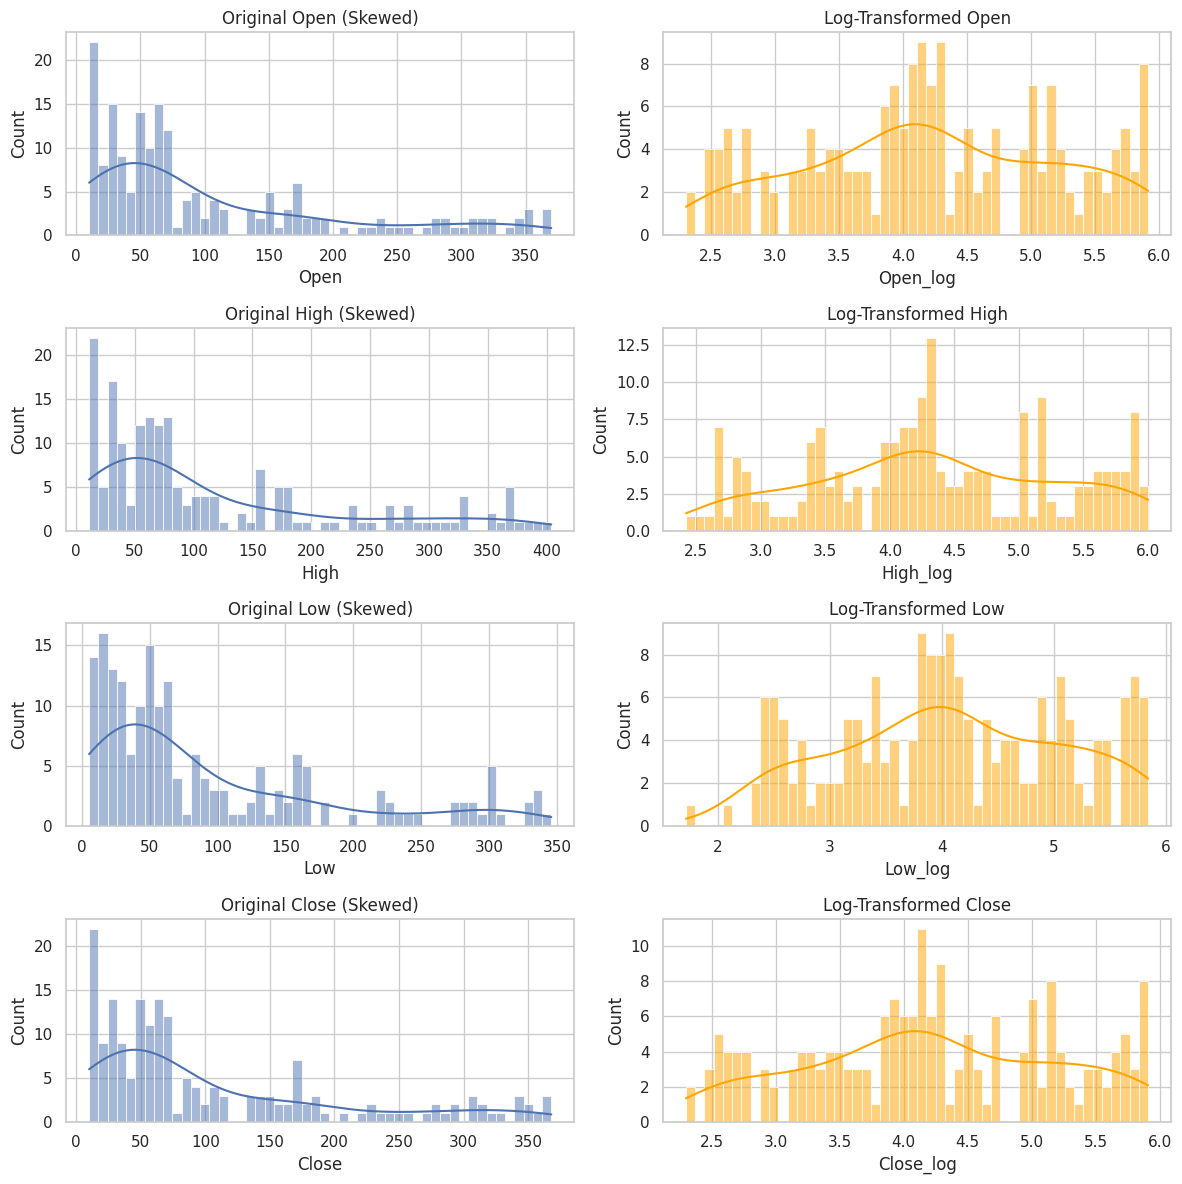

In [55]:
# Transform Your data

# Transformation Diagnostics (Before vs After Log)
# Apply log transform (since stock prices > 0)
for col in price_cols:
    bank_dataset[f'{col}_log'] = np.log(bank_dataset[col])

# Compare original vs log-transformed histograms
fig, axes = plt.subplots(len(price_cols), 2, figsize=(12, 12))

for i, col in enumerate(price_cols):
    # Original
    sns.histplot(bank_dataset[col], bins=50, kde=True, ax=axes[i,0])
    axes[i,0].set_title(f"Original {col} (Skewed)")

    # Log-transformed
    sns.histplot(bank_dataset[f'{col}_log'], bins=50, kde=True, color="orange", ax=axes[i,1])
    axes[i,1].set_title(f"Log-Transformed {col}")

plt.tight_layout()
plt.show()

### **Data Splitting & Data Scaling**

In [56]:
#  Splitting & Scaling your data
# Define features and target
X = bank_dataset[['Open_log', 'High_log', 'Low_log']]
y = bank_dataset['Close_log']

# Split your data to train and test. Choose Splitting ratio wisely.
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

Answer Here.

##### What data splitting ratio have you used and why?

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***